In [6]:
#Importing MOdules

import pandas as pd
import json
import seaborn as sns
from xgboost import XGBClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegressionCV



In [2]:
#Reading data

data=pd.read_json('train.json')

DATA VISUALIZATION (Other graphs are in separate file)

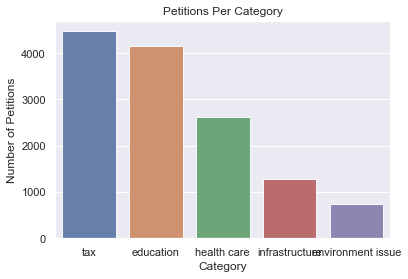

In [3]:
#Data visualization TOtal Petitions VS Petitions Category

carrier_count = data['petition_category'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Petitions Per Category')
plt.ylabel('Number of Petitions', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

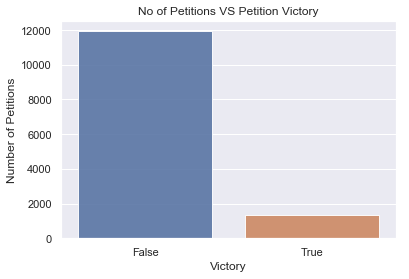

In [4]:
#Graph No. petitions VS Petition victory

carrier_count = data['petition_is_victory'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('No of Petitions VS Petition Victory')
plt.ylabel('Number of Petitions', fontsize=12)
plt.xlabel('Victory', fontsize=12)
plt.show()

DATA CLEANSING

In [7]:
data

,_score,_source_ask,_source_coachable,_source_country_code,_source_discoverable,_source_sponsored_campaign,_source_sponsorship_active,_source_user_state,filename,highlight_ask,...,petition_slug,petition_sponsored_campaign,petition_targeting_description,petition_title,petition_total_signature_count,petition_user_city,petition_user_country_code,petition_user_description,petition_user_state_code,petition_weekly_signature_count
0,2.379138,"MTA, LIRR, NYCT: South Queens Needs Transit!",False,US,True,False,True,NY,textfile_1010.json,['Use public <mark>infrastructure</mark> for s...,...,mta-lirr-nyct-south-queens-needs-transit,False,"NYC Metropolitan Transportation Authority, New...","MTA, LIRR, NYCT: South Queens NEEDS TRANSIT!",738,Rockaway Beach,US,Communications director for Assemblywoman Stac...,NY,0
1,1.328393,An amendement,False,IN,True,False,None,AL,textfile_2550.json,[' used in the billions of dollars worth of St...,...,the-vice-chancellor-an-amendement,False,"The Vice Chancellor, Makaut",The Vice Chancellor: An amendement,71,None,IN,None,None,0
2,1.714490,380 Children Without a Permanent School Need Y...,False,CA,True,False,True,GA,textfile_9190.json,['Pressure State Legislature for more Police D...,...,380-children-without-a-permanent-school-need-y...,False,Justin Trudeau,380 Children Without a Permanent School Need Y...,217,Vancouver,CA,None,None,0
3,1.917518,"Please Give Fellowship to the UGC, CSIR, DST J...",False,IN,True,False,True,WB,textfile_7540.json,['Take Back UNESCO Prize for Peace <mark>Educa...,...,smriti-zubin-irani-please-give-fellowship-to-t...,False,Smriti Zubin Irani,,283,Kolkata,IN,None,,0
4,1.299582,Legalize recreational use of Marijuana in Nort...,False,US,True,False,True,ENG,textfile_6190.json,['State of Virginia: Institute a wealth <mark>...,...,north-carolina-state-house-legalize-recreation...,False,"North Carolina State House, North Carolina Sta...",North Carolina State House: Legalize recreatio...,67,,US,None,,0
5,0.497756,"Dear Sri. Sushil Chandra, Please help us link ...",False,IN,True,False,None,DC,textfile_9280.json,['Wildlife Gun <mark>Tax</mark> is Misguided: ...,...,cbdt-dear-sri-sushil-chandra-please-help-us-li...,False,"CBDT, Sri. Sushil Chandra, Chairman CBDT","CBDT: Dear Sri. Sushil Chandra, Please help us...",7,Челябинск,IN,None,None,0
6,1.544301,"Permanent Vice Chancellor, basic needs for Dr....",False,IN,True,False,None,GA,textfile_2270.json,['Create bicycle <mark>infrastructure</mark> i...,...,vajubai-vala-permanent-vice-chancellor-basic-n...,False,"Vajubai vala, G.T.Devegowda","Vajubai vala: Permanent Vice Chancellor, basic...",112,,IN,None,,0
7,1.732526,Say NO to reducing Early Years Funding in Nort...,False,GB,True,False,True,ENG,textfile_9060.json,['Opt for proper authenticated <mark>education...,...,st-john-s-playgroup-say-no-to-reducing-early-y...,False,greeningj@parliment.uk,St John's Playgroup: Say NO to reducing Early ...,184,Harrogate,GB,,ENG,0
8,2.829885,We can tax gas,False,US,True,False,True,MN,textfile_1150.json,['We can <mark>tax</mark> gas'],...,we-can-tax-gas,False,President of the United States,We can tax gas,99,Moorhead,US,Disabled Greens News + discussion:\r\nhttp://w...,MN,0
9,1.339790,Premature babies born alive should be given fu...,False,CA,True,False,True,WA,textfile_5260.json,['Premature babies born alive should be given ...,...,justin-trudeau-premature-babies-born-alive-sho...,False,"Justin Trudeau, Donald J. Trump, Christine Ell...",Justin Trudeau: Premature babies born alive sh...,26,,US,,WA,0


In [28]:
#Selecting most affected columns from data

FilteredData = data.filter(['_score', 'petition_displayed_signature_count','petition_goal','petition_progress','petition_primary_target_is_person','petition_sponsored_campaign','petition_primary_target_type' ,'petition_total_signature_count'],axis=1)
#,'petition_category'

In [29]:

y=data.filter(['petition_is_victory'])
y["petition_is_victory"].replace(["True","False"], [1,0], inplace=True)


In [31]:
#Data cleansing

FilteredData["petition_goal"].replace(["None"], 0, inplace=True)
FilteredData["petition_primary_target_is_person"].replace(["True","False"], [1,0], inplace=True)
#FilteredData["petition_category"].replace(['infrastructure', 'education', 'tax', 'health care','environment issue'], [0,1,2,3,4], inplace=True)


In [ ]:
#Converting string data to Integer

FilteredData['petition_goal']=pd.to_numeric(FilteredData['petition_goal'])

In [44]:
#Train - Test Split of data

X_train, X_test, y_train, y_test = train_test_split(FilteredData, y, test_size=0.33, random_state=42)

MACHINE LEARNING ALGORITHM IMPLEMENTATION

In [210]:
#Using XGBoost Classifier for binary classification

model = XGBClassifier(random_state=32,learning_rate=0.05,
                      max_depth=3,booster='gbtree',objective='binary:logistic',
                      eval_metric ='rmse')
model.fit(X_train, y_train)

C:\Users\bk\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bk\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='rmse', gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=32, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [186]:
#Prediciting test values

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [214]:
# evaluate predictions 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy using XGBoost: %f" % (accuracy * 100.0))

Accuracy using XGBoost: 91.510726


In [190]:
#FOr Validation
valid=pd.read_json('validation.json')
FileteredValid = valid.filter(['_score','petition_category', 'petition_displayed_signature_count','petition_goal','petition_progress','petition_primary_target_is_person','petition_sponsored_campaign','petition_primary_target_type' ,'petition_total_signature_count'],axis=1)
#fY=valid.filter(['petition_is_victory'])

#Data Cleaning
#fY["petition_is_victory"].replace(["True","False"], [1,0], inplace=True)
FileteredValid["petition_goal"].replace(["None"], 0, inplace=True)
FileteredValid["petition_primary_target_is_person"].replace(["True","False"], [1,0], inplace=True)
FileteredValid["petition_sponsored_campaign"].replace(["True","False"], [1,0], inplace=True)
FileteredValid["petition_primary_target_type"].replace(['Custom', 'Group', 'Role', 'Politician'], [0,1,2,3], inplace=True)
#FileteredValid["petition_category"].replace(['infrastructure', 'education', 'tax', 'health care','environment issue'], [0,1,2,3,4], inplace=True)



In [191]:
FileteredValid['petition_goal']=pd.to_numeric(FileteredValid['petition_goal'])

In [192]:
fXG_Pred=model.predict(FileteredValid)

In [209]:
output['petition_id']=valid['petition_id']
output['petition_is_victory']=pd.DataFrame(fXG_Pred, columns=['petition_is_victory'])

output['petition_is_victory'].replace([1,0], ["True","False"], inplace=True)
output.to_csv('out1.csv', sep=',',index=False)

# We Tried Many other Algorithms, but XGBoost was Giving Best Accuracy !! So, we go with it. Outputs for different algorithm is as given below.




In [189]:
#Decision Tree Classifier with criterion as gini

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [59]:
#Decision Tree Classifier with Creterion as entropy

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [60]:
clf_gini.predict([X_test.iloc[74]])

array([0], dtype=int64)

In [61]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [216]:
print("Accuracy with Decision Tree(gini) is ", accuracy_score(y_test,y_pred)*100)

Accuracy with Decision Tree(gini) is 91.07713372889091


In [217]:
print("Accuracy with Decision tree is ", accuracy_score(y_test,y_pred_en)*100)


Accuracy with Decision tree(Entropy) is 91.07713372889091


In [285]:
#Using Support Vector Classifier

clf_SVC = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf_SVC.fit(X_train, y_train)

C:\Users\bk\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [288]:
y_SCV=dec = clf_SVC.decision_function([X_test.iloc[1]])



In [292]:
#USing Random FOrest Classifier


clf_RandomF=RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_RandomF.fit(X_train, y_train)

C:\Users\bk\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [294]:
y_RF=clf_RandomF.predict(X_test)
print("Accuracy in Random Forest Algorithm is ", accuracy_score(y_test,y_RF)*100)
clf_RandomF.feature_importances_

Accuracy in Random Forest Algorithm is  90.20994979461433


array([1.00983280e-01, 1.54587442e-01, 4.98152420e-01, 6.25164268e-02,
       3.11596767e-04, 2.64222357e-02, 5.33271210e-03, 1.51693887e-01])

In [297]:
#Feature Importance in model

feature_importances = pd.DataFrame(clf_RandomF.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
petition_goal,0.498152
petition_displayed_signature_count,0.154587
petition_total_signature_count,0.151694
_score,0.100983
petition_progress,0.062516
petition_sponsored_campaign,0.026422
petition_primary_target_type,0.005333
petition_primary_target_is_person,0.000312


In [219]:
#Using SGD Classifier

clf_SGD = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf_SGD.fit(X_train, y_train)

C:\Users\bk\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [220]:
y_SGD=clf_SGD.predict(X_test)
print("Accuracy in SGD Algorithm is ", accuracy_score(y_test,y_SGD)*100)


Accuracy in SGD Algorithm is  90.07302601551802


In [221]:
#Using Logistic Regression

clf_LR = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)

C:\Users\bk\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [222]:
y_LR=clf_LR.predict(X_test)
print("Accuracy in Logistic Regression Algorithm is ", accuracy_score(y_test,y_LR)*100)

Accuracy in Logistic Regression Algorithm is  90.18712916476494


In [218]:
clf_LRCV= LogisticRegressionCV(cv=5, random_state=0,multi_class='multinomial').fit(X_train, y_train)

C:\Users\bk\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [220]:
y_LRCV=clf_LRCV.predict(X_test)
print("Accuracy in Logistic RegressionCV Algorithm is ", accuracy_score(y_test,y_LR)*100)

Accuracy in Logistic RegressionCV Algorithm is  90.09584664536742


In [223]:
#Using KNN Classifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

C:\Users\bk\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [224]:
y_KNN=knn.predict(X_test)
print("Accuracy in KNN Classifier Algorithm is ", accuracy_score(y_test,y_KNN)*100)

Accuracy in KNN Classifier Algorithm is  89.16020082154267
